In [9]:
import ahkab
import numpy as np
import scipy as sp
import matplotlib 
from matplotlib import pylab as plt
import sympy
%matplotlib inline

In [10]:
def dB20(x):
    return 20*np.log10(x)


In [11]:
Q0 = Rp/XL
RP = Q0*XL


NameError: name 'Rp' is not defined

Circuito:

In [12]:
f0 = 10e6
L1 = 3.18e-6
C1 = 74.8e-12
C2 = 5.3e-12
RL = 1e3
RG = 10e3
Q0 = 100
RP = Q0*L1*2*np.pi*f0

In [13]:
bpf = ahkab.Circuit('RLC bandpass')
bpf.add_inductor('L1', 'in', bpf.gnd, L1)
bpf.add_inductor('RP','in',bpf.gnd, RP)
bpf.add_capacitor('C1', 'in', bpf.gnd, C1)
bpf.add_capacitor('C2', 'in', 'n1', C2)
bpf.add_resistor('RL', 'n1',bpf.gnd, RL)
bpf.add_resistor('RG','in',bpf.gnd,RG)
bpf.add_isource('I1', 'in', bpf.gnd, dc_value=1, ac_value=1)

Simulación:

In [14]:
aca = ahkab.new_ac(start=1e3*2*np.pi, stop=2e9*2*np.pi, points=5e3, x0=None)

In [15]:
rac = ahkab.run(bpf,aca)['ac']

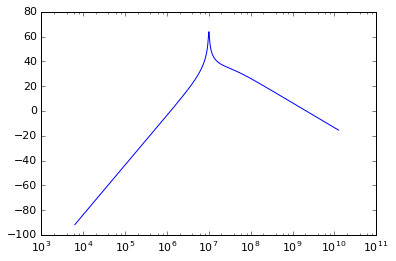

In [16]:
plt.semilogx(rac.get_x(),dB20(np.abs(rac['Vn1'])))
plt.rcParams["figure.figsize"] = 22,10
#plt.xlim(3e7,0.6e8)

In [17]:
bpf.add_model

<bound method Circuit.add_model of [<ahkab.devices.Inductor object at 0x7f71ce7fd978>, <ahkab.devices.Inductor object at 0x7f71ce7fd940>, <ahkab.devices.Capacitor object at 0x7f71ce7fd9e8>, <ahkab.devices.Capacitor object at 0x7f71ce7fd9b0>, <ahkab.devices.Resistor object at 0x7f71ce7fda58>, <ahkab.devices.Resistor object at 0x7f71ce7fdac8>, <ahkab.devices.ISource object at 0x7f71ce7fda20>]>

In [22]:
text = ""
for i in range(1,10):
    text += str(i)
    print(text)

1
12
123
1234
12345
123456
1234567
12345678
123456789
